# Linkit Grundlagenschulung (1. Teil)

## 1. Business Understanding

An established food retailer has introduced a self-scanning system that allows customers to scan their items using a handheld mobile scanner while shopping. This type of payment leaves retailers open to the risk that a certain number of customers will take advantage of this freedom to commit fraud by not scanning all of the items in their cart.

To minimize losses, the food retailer hopes to identify cases of fraud using targeted follow-up checks. The challenge here is to keep the number of checks as low as possible to avoid unnecessary added expense as well as to avoid putting off innocent customers due to false accusations. The objective is to create a model to classify the scans as fraudulent or non-fraudulent. The classification does not take into account whether the fraud was committed intentionally or inadvertently.

- **Trust Level** ~ A customers trust level rated between 1-6
- **Total scan time in sec** ~ total time in seconds between first and last product scanned
- **Grand total** ~ Total of products scanned
- **Scans without registration** ~ Attempts to scan something without actually scanning something
- **Scanned lined items per seconds** ~ Average number of scanned products
- **Value per second** ~ Average total value per second
- **Line items void per Position** ~ Avg number of item voids per total nr of all scanned and not canceled product
- **Customer Sex** ~ Information about the sex of the customer
- **Store Location** ~ Location of the Store
- **Payment Type** ~ Information on the type of payment (credit card, debit card, ...) used for  the transaction
- **Fraud** ~ Fraudulent (1) or not fraudulent (0)

## 2. Data Understanding: Quick Overview
How do we get a quick overview over the data set?



In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
data = pd.read_csv('./data.csv')

After successfull data import its essential to have a look at the data to check whether the import was successfull and to get an overall impression on data types, number of Null-counts etc.

The pandas library provides several methods for that, lets have a look at it:

*df.head()* shows the first n rows (default: 5) of the dataframe. It is commonly used to quickly test whether the data input was successfull and to get a solid overview of the data.

In [ ]:
data.head()

In [ ]:
data.tail()

*df.info()* shows information about the dataframe including datatypes of each feature. This is super useful to detect whether there are for example any NaN values or if the columns appear in their expected data type, such as float32 or 64, int32 or 64, String, boolean,...). For example, if in a later stage some calculations fail, it is often worth a look to check whether the data types are of their expected format.

In [ ]:
data.info()

*df.describe()* shows some descriptive statistics about the data. It gives a comprehensive understanding on the distribution per column and shows for example min and max values.

For us, it is useful to really get a good understanding of our features so that in a later step we are able to decide which one to use for modeling tasks. Let's have a look:

In [ ]:
data.describe()

Now you: What is your first impression on the data? Any inconsistencies? Everything okay? Please take a look and share your thoughts.


After gaining a first impression with the methods explained before, it might be crucial to look at some rows or columns in more detail. Moreover, these methods that will be explained here are helpul to select data by position or index and thus allows intuitive getting and setting of subsets.

Data can be selected as follows:

(1) by one or several column names,

(2) using a conditional selection of column values,

(3) by index position.



To select a column, the columns name has to be handed over by using squared brackets []. Like this, a lower-dimensional slice of the data is selected <br/>
(Hint: Strings, usually the data type of column headers, have to be handed over within ' ')

In [ ]:
# selection by column
# ...using single brackets will output a Pandas Series
data['trustLevel']

In [ ]:
# ...using double brackets will output a Pandas DataFrame
data[['trustLevel']]

Likewise, it is also possible to select multiple columns:

In [ ]:
# selection of several columns
data[['scannedLineItemsPerSecond', 'valuePerSecond']]

Moreover, it is possible to select only those entries of a column that fulfill a certain condition. As you have learned in the DataCamp course, a conditional query can be expressed using ==.
For better understanding, lets see what happens if we add this conditional expression to our selection:

In [ ]:
# condition
data['fraud']==1

Not quite what we wanted to see... It gives an understanding of which rows fulfill the expression, but as before we want to obtain the origional data. To archieve this, the conditional selection needs to be integrated into the actual selection:

In [ ]:
# conditional selection
data[data['fraud']==1]

Another commonly used and important way of performing label-based selections is using the method *loc*. *Loc* is a method for accessing rows and columns by passing a label, a list of labels, or a boolean array.

In [ ]:
# another way to perform conditional selection / access by label
data.loc[(data['trustLevel']==3)]

In [ ]:
# conditional selection of one column
data.loc[(data['trustLevel']==3), ['scansWithoutRegistration']]

To select values by their position, the method *iloc* is used. *Iloc* is integer position based so that either a single int or a range of ints have to be handed over to access the respective positions.

In [ ]:
#selection by position
data.iloc[3]

In [ ]:
data.iloc[5:10]

To retrieve the index position of a selection, the functions *Index.values* is used. *Index* stores all axis labels. With *values*, a numpy representation of the Index can be retreived.

In [ ]:
# get Index:
list(data[data['storeLocation']=='München'].index.values)

Often it is usefull to create a copy of the dataframe. This can be done by either create a deep copy which creates a new object with a copy of an objects inidces and data (deep=True). All modifications to the copied dataframe will not be reflected in the origional dataframe. Another possibility is to create a shallow copy (deep=False) with references to the origional datas inidces and data, so that any changes to the origional dataframe will be reflected in the copy as well. The pandas function .copy() creates a deep copy by default.  

In [ ]:
# create a copy of the dataframe
data_new = data.copy()

In [ ]:
# moreover sometimes it might be good to delete a column, e.g. when their information is not usefull for your task
data_new = data_new.drop(columns='customer_sex')

In [ ]:
data_new.head()

Hint: Find comprehensive explanations and exploit further methods in the pandas documentation:

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.values.html

### Now you: Data Overview

Perform the following selections:
1.    Return all purchases where the number of scans without registration is higher than 5. 
2.    How many purchases with a trust level below 2 are done in Munich?
3.    What is the maximum scanned line items per second of those purchases that include more than three scans without registration?
4.    Return the index of the purchases where the grandTotal is higher than 60 and the trust level below 3

Solution

In [ ]:
# 1)
data.loc[(data['scansWithoutRegistration'] > 5)]
# data[(data['scansWithoutRegistration'] > 5)]

In [ ]:
# 2)
data.loc[(data['trustLevel']<2) & (data['storeLocation'] == 'München')].count()

In [ ]:
# 3)
# data['scannedLineItemsPerSecond'].loc[data['scansWithoutRegistration']> 3].max()
data.loc[data['scansWithoutRegistration']> 3, ['scannedLineItemsPerSecond']].max()

In [ ]:
# 4)
data2 = data.loc[(data['grandTotal'] > 60.0 ) & (data['trustLevel']<3)]
list(data2.index.values)

### Feature Generation

Sometimes our dataset inlcudes one or multiple existing information (features) that can be thoughtfully combined to a new feature providing additional information. Let's have a look if we can find something in our dataset.

In [ ]:
data.head()

In [ ]:
# example for feature generation: use scanTimeInSeconds multiplied with scannedLineItemsPerSecond to get the total number of items scanned
data['totalItems'] = (data['totalScanTimeInSeconds']*data['scannedLineItemsPerSecond'])
data['totalItems']

In [ ]:
data['checkoutTime'] = data['checkoutTime'].astype(np.datetime64)
data['checkoutDate'] = data['checkoutTime'].dt.date
data['checkoutDate']

### Now You: Feature Generation

Calculate the following features and save them as a new column: 

1. Time features: 
    1. Checkout month
    2. Checkout year
    3. Hour of checkout
    

2. Price feature: Average Price per Item in a Transaction

**Note**: Save the value as a new column called 'meanPricePerItem'

In [ ]:
# 1)
data['checkoutMonth'] = data['checkoutTime'].dt.month
data['checkoutYear'] = data['checkoutTime'].dt.year
data['checkoutDayTime'] = data['checkoutTime'].dt.hour

In [ ]:
# 2)
data['meanPricePerItem'] = (data['grandTotal'] / data['totalItems'])
data['meanPricePerItem']

see more here: pandas doc https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

## 3. Data Understanding: Data Visualization & Insights

In order to gain insight into our data through plots, we can use several libraries.
Some of them are briefly introduced below.
The **most important is the Python standard library called Matplotlib**. Its a useful tool when we want to create complex plots. However, the **code effort** is higher than if we use e.g. the **pandas plot API**.
The most important plots are shown below, using both Matplotlib and the Pandas API.


**Note:** You will find a link to the documentation of each plot in the notebook. If you want to look up how to use it, just follow the link.

### Load Packages

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation Heatmap

This plot helps us to get a quick overview and find out which features are correlated with each other.<br>
Further information: https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
corMat = data.corr()
sns.heatmap(corMat, xticklabels=corMat.columns, yticklabels=corMat.columns, annot=False)

### Scatterplot

Sometimes we just need to plot two single features against each other. In this case we can create a scatterplot.<br>
Matplotlib: https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.scatter.html <br>
Pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html<br>

In [ ]:
plt.plot( data['grandTotal'], data['meanPricePerItem'], 'x', color='red' )
plt.xlabel('grand total')
plt.ylabel('mean price per item')
plt.title('grand total vs. mean price per item')
plt.show()

In [ ]:
data.plot.scatter(x='grandTotal', y='meanPricePerItem');

There seems to be some relation between meanPricePerItem and grandTotal. How can we explain this plot? Is the information useful?

### Boxplot

What is the mean of a feature? How is it distributed? Are there outliers? A simple boxplot can answer all these questions <br>
Matplotlib: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html<br>
Pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html<br>

In [ ]:
bxdct = plt.boxplot(data['grandTotal'])
plt.xlabel('grandTotal')
plt.title('Boxplot of grandTotal')

In [ ]:
data['grandTotal'].plot.box()

### Histogram

Histograms are an easy way to get a first impression of the distribution of a feature. It helps us to find out which values are more common and which ones rarely occur. If some values occur never / more often than others / less than others we should ask ourselfs if there is a reason.

Matplotlib: https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.hist.html<br>
Pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html<br>

In [ ]:
ax = plt.hist( data['totalScanTimeInSeconds'] , bins=20)

In [ ]:
data['totalScanTimeInSeconds'].hist( bins=20 )

### Displot

Displots are a powerful tool to learn more about feature distribution. We can look at a histogram as well as the density distribution of individual features. The keyword 'hue' can also be used to distinguish between different classes.

Documentation:https://seaborn.pydata.org/generated/seaborn.displot.html

In [ ]:
sns.displot(data=data, x="trustLevel", hue="fraud", multiple="stack", kind='hist', kde=False)

In [ ]:
sns.displot(data=data, x="meanPricePerItem", hue="fraud", multiple="stack", kind='kde')

### Scatter-Matrix


"One plot to rule them all". Just like the correlation-heatmap, we can use this plot to get an overview of some features. Note that this plot can get very big if we use many features! It shows provides a scatterplot for each pair of features and a kernel-density-estimation for each individual feature. Like we already saw in the displot, we can distinguish between different classes using the 'hue' keyword.

Documentation: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [ ]:
scatterMat_features = ['valuePerSecond','meanPricePerItem','totalScanTimeInSeconds','lineItemVoidsPerPosition','fraud']
sns.pairplot(data[scatterMat_features], hue='fraud')

### Line Graph

If we can look at a feature over a period of time, then a line graph can be helpful.

Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html### Line Graph

In [ ]:
monthlyReport = data.groupby(['checkoutMonth','checkoutYear']).sum()
monthlyReport

In [ ]:
monthlyReport.plot(y='fraud', kind = 'line')

### Now you: Plotting
1) The manager wants to know the monthly turnover. Create a plot that shows the monthly turnover (sum over grandTotal). Use Panda's plotting API to do this.

2) You want to prove that people make more expensive purchases during the Christmas season and therefore the turnover per transaction is higher. Create a suitable plot to test the claim.

***Hint***: You need to group the data again, using mean() instead of sum()

3) In order to prevent frauds, you want to employ additional personnel. Since this is a costly meassure, you want to limit the working time, to the hours with the highest risk of fraud. Create a plot, that shows, at what time fraudulent transactions take place most frequently.

4) You are convinced that some stores make a good job preventing fraud while others don't. Check if you can prove that at some stores (storeLocation) a disproportionate amount of fraud takes place. You could check this hypothesis by investigating the proportion of fraudulent transactions per store.

***Hint***: To do so, you can regroup the data by the 'storeLocation' feature. By using the count()-method you will get the total number of transactions per store. The sum()-method will yield the number of fraudulent transactions. Maybe the displot above can provide you some help.

In [ ]:
# 1)
monthlyReport.plot(y='grandTotal', kind = 'bar')

In [ ]:
# 2)
monthlyReport = data.groupby(['checkoutMonth','checkoutYear']).mean()
monthlyReport.plot(y='grandTotal', kind='bar')

In [ ]:
# 3)
hourlyReport = data.groupby('checkoutDayTime').sum()
hourlyReport.plot(y='fraud', kind='bar')

In [ ]:
#3) in comparison to the the unfraudulent transactions
sns.displot(data=data, x="checkoutDayTime", hue="fraud", multiple="stack", kind='hist', kde=False)

In [ ]:
# 4)
localReport = data.groupby('storeLocation').sum()
localTransactions = data.groupby('storeLocation').count()
localReport.plot(y=['fraud'], kind='bar')
localTransactions.plot(y=['fraud'], kind='bar')

In [ ]:
# 4) using a single plot
sns.displot(data=data, x="storeLocation", hue="fraud", multiple="stack", kind='hist', kde=False)

## 4. Data Preparation
Preprocessing & Cleaning

### Check dtypes

In [ ]:
data.dtypes

### Replace NA-Values

NA-Values can cause problems when fitting models. Therefore, we want to fill these gaps in our dataset.
There are several options to do so. For example we can either fill a gap with the next valid observation 'bfill' or with the previous valid ovservation 'ffill'

In [ ]:
data['customer_sex'].isnull().values.any()
data['customer_sex']

In [ ]:
data['customer_sex'] = data['customer_sex'].fillna(value='Unknown')
data['customer_sex']

### Standardization and Normalization 

#### Normalization: Scale values between 0 and 1
Sometimes we want to check if two datapoints are similar to each other. We could do so by comparing the values of each feature for the given datapoints. But what happens if one feature ranges from 0 to 100 and the other from 0.1 to 0.2 ? A difference of 5 in the first feature is not as much as a distance of 0.05 in the second! In order to be able to compare the difference of feature values we should scale them to the same range e.g. between 0 and 1. Then a difference of 0.5 has the same importance - no matter what feature we are looking at.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['valuePerSecondScaled'] = scaler.fit_transform(data[['valuePerSecond']])
data['valuePerSecondScaled'].describe()

In [ ]:
sns.displot(data['valuePerSecond'], kind='kde')
plt.xlim(0,2)
plt.title('Unscaled')
sns.displot(data['valuePerSecondScaled'], kind='kde')
plt.xlim(0,2)
plt.ylim(0,10)
plt.title('Normalized')

#### Standardization: Scale with mean of 0 and std of 1
Sometimes scaling between 0 and 1 isn't enough. What if we do not care about the actual value of a feature but more about its deviation from a certain value e.g. the mean value? In this case it makes sense to scale our feature in a way, so that the values have a mean of 0 and a standard deviation of 1. Therefore we can easily see 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['scannedLineItemsPerSecondScaled'] = scaler.fit_transform(data[['scannedLineItemsPerSecond']])
data['scannedLineItemsPerSecondScaled'].describe()

In [ ]:
sns.displot(data['scannedLineItemsPerSecond'], kind='kde')
plt.xlim(-2,2)
plt.title('Unscaled')
sns.displot(data['scannedLineItemsPerSecondScaled'], kind='kde')
plt.xlim(-2,2)
plt.title('Standardized')

### Dummy Features

We often have to deal with categorial features. In order to be able to work with them, we often have to encode them correctly. There are two approaches for this task:

***One-Hot Encoding***

One-hot encoding means converting each category value into a new column and assigns a 1 or 0 (True/False) value to the column

We apply One-Hot Encoding when:
1. The categorical feature is not ordinal (e.g. a set of countries which is encoded using numbers)
2. The number of categorical features is less so one-hot encoding can be effectively applied

***Label Encoding***

Label encoding is simply converting each value in a column to a number

We apply Label Encoding when:
1. The categorical feature is ordinal (e.g. trust_level 2 is better than trust level 1)
2. The number of categories is quite large as one-hot encoding can lead to high memory consumption 


#### One-Hot Encoding

In [ ]:
data['customer_sex']

In [ ]:
pd.get_dummies(data['customer_sex'])

#### Label Encoding

In [ ]:
data['paymentType']

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['paymentType'])

In [ ]:
# list of labels
le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_mapping)

In [ ]:
pd.Series(le.transform(data['paymentType']))

### Now you: Preprocessing
1) Encode the feature storeLocation with a suitable encoding Method

2) perform a Normalization for the feature grandTotal. Save the calculated feature as grandTotalScaled.

In [ ]:
#1) overview
data[['storeLocation']].describe()

In [ ]:
# 1) solution
le = preprocessing.LabelEncoder()
le.fit(data['storeLocation'])
data['storeLocation'] = le.transform(data['storeLocation'])
print(data['storeLocation'])

In [ ]:
# 2) overview
data[['grandTotal']].describe()

In [ ]:
# 2) solution
scaler = StandardScaler()
data['grandTotalScaled'] = scaler.fit_transform(data[['grandTotal']])
data[['grandTotalScaled']].describe()

# Linkit Grundlagenschulung (2. Teil)


## 5. Modeling

In the first session, we have taken all the necessary steps to load and prepare the data. 
In the next to chapters, we will learn how we can train a model that is able to classify the transactions into fraudulent and non-fraudulent transactions

First of all, we need to make sure what our goal is. Here in this case, it will be the detection of fraudulent transactions, therefore we have a classification task at hand. <br>
Before we can begin choosing a model, we need to seperate the data into features (X), which are the inputs for the model and the label (y), which the classifier will try to predict. 

Let's recap on the types of features we have in our dataset

In [ ]:
data.info()

In [ ]:
# We can now decide to either take all the features and only drop the column with the label
X = data.drop(['fraud'], axis=1)
X.head()

In [ ]:
# ... or explicitly select a subset of features we want to use for the classification  
X = data[['trustLevel', 'grandTotal', 'totalScanTimeInSeconds', 'checkoutDayTime']]
X.head()

Hint: There are smarter ways on deciding which features might be relevant for the classification process. For this introductory lesson, we just pick the once that sound the most promising ;-)

In [ ]:
# Here we select the column / feature that we want to predict - 'fraud'
y = data['fraud']

Now we have the data ready for our classifier -- we have sperated the features (X) from the label (y)

Next, we need to decide what classifier we want to use for our prediction

The scikit-learn library gives us a nearly endless choice of classifiers we can use. 

We start with a very simple classifier, the k-nearest neighbor classifier. 

More Information: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [ ]:
# We first need to import the selected classifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# The next step is to create an instance of the selected classifier-class
clf_nn = KNeighborsClassifier(n_neighbors=5)
clf_nn

We already decided in a Hyperparameter for the model. By choosing n_neighbors=5, we tell the model to look for the 5 nearest data points to determine the class of a unknown data point

In [ ]:
# Next up, we can call the fit() method, which takes the features X and the label y
# to train the selected classifier
clf_nn.fit(X, y)

In [ ]:
# Now we can easily check with the method score(), how good our classifier is
clf_nn.score(X, y)

Wow! That score seems to be pretty good

### Now you: Modeling
Let's see if, using a different method, we can even get a better score! 

1) Try using a Decision Tree Classifier to predict the fraudulent transactions. 

(Hint: Look into the API if you get stuck... [Scitkit-learn: DecisionTreeClassifier API](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

2) See what happens if you change the parameter controlling the maximum depth of the Decision Tree

Solution 1)

Solution 2)

Unfortunately, we might have done something wrong.. 

the results of our very simple classifiers seem too good to be true.

But what problem are we facing here exactly?

## 6.  Evaluation

As we want our model to perform good on unseen data (and not on the training data) we now split our dataset in 2 pieces: a trainset and a testset.

### Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lets train our decision tree again, but now only on the training data:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)
# clf_dt.score(X_train, y_train)
clf_dt.score(X_test,y_test)

Still pretty good isn't it? Maybe too good? Let's find it out.

In [ ]:
clf_dt.get_depth()

In [ ]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(clf_dt, feature_names=X_train.columns, class_names=['non-fraud', 'fraud'], max_depth=3, proportion=False)
plt.show()

We can see that the first three nodes of the decision tree already seperate the data pretty well. Maybe we can reduce the maximum depth of the tree to prevent it from overfitting?!

In [ ]:
clf_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_dt.fit(X_train, y_train)
# clf_dt.score(X_train, y_train)
clf_dt.score(X_test,y_test)

Cool! This really worked out. With a decreased depth of 3 our model now actually performs better on the unseen test data!

But what does the score() method really tell us?

### Overview over different Metrics

To evaluate the performance of our model, we have to determine a quantified comparision of the predicition and the ground truth. There are plenty of options for quantification, lets get a quick overview:

In [ ]:
y_pred = clf_dt.predict(X_test)

In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)


print("Accuracy: %8.5f" % accuracy)
print("Precision: %8.5f" % precision)
print("Recall: %8.5f" % recall)

Learn more about how the metrics work in detail in the [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

To learn more about how to print properly formated numbers click [here](https://www.geeksforgeeks.org/python-output-formatting/).

### Confusion Matrix

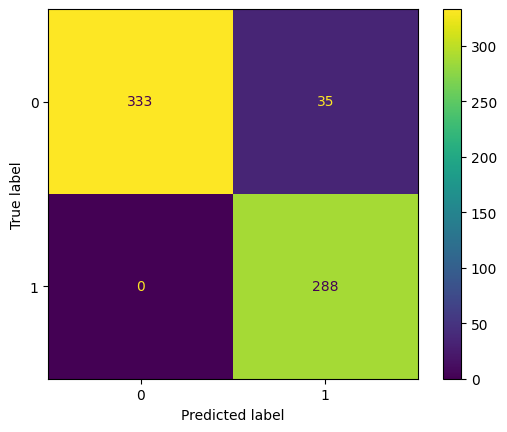

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

### Dummy Classifier

Now we have a quantified evaluation of our model. But how can we determine if this score should be considered good or bad?

Lets compare it to a dummy classifier:

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X, y)
dummy_pred = dummy_clf.predict(y_test)
accuracy = metrics.accuracy_score(y_test, dummy_pred)
print("Accuracy of a dummy classifier: %8.5f" % accuracy)

Accuracy of a dummy classifier:  0.46037


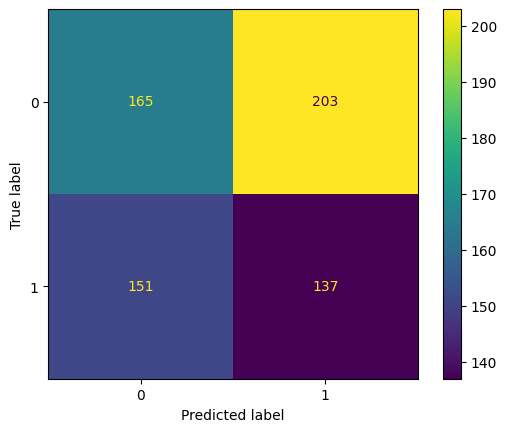

In [ ]:
cm2 = metrics.confusion_matrix(y_test, dummy_pred)
disp = metrics.ConfusionMatrixDisplay(cm2)
disp.plot()

### Dummy Classifier

Now we have a quantified evaluation of our model. But how can we determine if this score should be considered good or bad?

Lets compare it to a dummy classifier:

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X, y)
y_pred = dummy_clf.predict(y_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of a dummy classifier: %8.5f" % accuracy)

If we just guess randomly, we still reach an accuracy of about 50%. We should keep that in mind, when evaluating our results

### Now you: Evaluation
Test your model (Decision Tree) using a Train-Test-Split. Choose three different metrics for evaluation purposes

Your Solution